In [1]:
import logistic_regression as logreg
import numpy as np
import matplotlib.pyplot as plt
import math

dtype=[
        ('id', 'float'),
        ('diagnosis', 'U1'),
        ('radius_mean', 'float'),
        ('texture_mean', 'float'),
        ('perimeter_mean', 'float'),
        ('area_mean', 'float'),
        ('smoothness_mean', 'float'),
        ('compactness_mean', 'float'),
        ('concavity_mean', 'float'),
        ('concave points_mean', 'float'),
        ('symmetry_mean', 'float'),
        ('fractal_dimension_mean', 'float'),
        ('radius_se', 'float'),
        ('texture_se', 'float'),
        ('perimeter_se', 'float'),
        ('area_se', 'float'),
        ('smoothness_se', 'float'),
        ('compactness_se', 'float'),
        ('concavity_se', 'float'),
        ('concave points_se', 'float'),
        ('symmetry_se', 'float'),
        ('fractal_dimension_se', 'float'),
        ('radius_worst', 'float'),
        ('texture_worst', 'float'),
        ('perimeter_worst', 'float'),
        ('area_worst', 'float'),
        ('smoothness_worst', 'float'),
        ('compactness_worst', 'float'),
        ('concavity_worst', 'float'),
        ('concave points_worst', 'float'),
        ('symmetry_worst', 'float'),
        ('fractal_dimension_worst', 'float')
    ]

features = list(map(lambda t: t[0], dtype[2:]))

data = np.loadtxt(
    './data/breast-cancer.csv',
    delimiter=',',
    skiprows=1,
    dtype=dtype
)

In [2]:
def convert(raw_data):
    x_train = []
    y_train = []
    
    for entry in raw_data:
        item = list(entry)

        # diagnosis is the 2nd column 
        y_train.append(1 if item[1] == 'M' else 0)

        # training features start from 3rd column
        x_train.append(item[2:])
    return np.array(x_train), np.array(y_train)
        

In [3]:
x_train, y_train = convert(data)

mu = np.mean(x_train)
sigma = np.std(x_train)

x_norm = (x_train - mu)/sigma

In [4]:
print(f'Training samples: {x_train.shape}')
print(f'Training targets: {y_train.shape}')

Training samples: (569, 30)
Training targets: (569,)


In [5]:
from importlib import reload
reload(logreg)

w_init = np.zeros(x_train.shape[1])
b_init = 0.

costs, w, b = logreg.fit(x_norm, y_train, w_init, b_init, 0.15, 1000)
print(w, b)

[0] 0.6656103166269052
[100] 0.28820148670577156
[200] 0.24195721726774697
[300] 0.22292595894968456
[400] 0.21216764140057312
[500] 0.20507953661328462
[600] 0.1999638584849844
[700] 0.1960417743443401
[800] 0.19290346368427752
[900] 0.1903116929229144
[ 0.57791135  0.65581861  0.14680386 -1.08981314  0.6751554   0.67743602
  0.67907869  0.67692888  0.67479089  0.67503598  0.67737663  0.6707341
  0.69318915  1.02297855  0.67540052  0.67583767  0.67598717  0.67552707
  0.67536161  0.67543873  0.61126014  0.72893666  0.40926898  2.76492811
  0.6755668   0.68377283  0.68661267  0.67841467  0.6761232   0.6757362 ] -2.4914214409478324


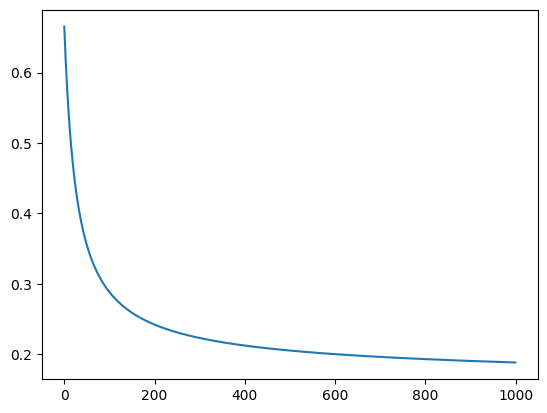

In [6]:
# Visualize cost
fig, ax = plt.subplots()

ax.plot(costs)

In [7]:
def evaluate(y_pred, y_train, thresold = 0.5):
    
    # true positive
    tp = 0
    # false positive
    fp = 0
    # false negative
    fn = 0
    for i in range(len(y_pred)):
        target = y_train[i]
        pred = y_pred[i]

        if (target == 1 and pred == 1) or (target == 0 and pred == 0):
            tp += 1
        elif target == 1 and pred == 0:
            fn += 1
        elif target == 0 and pred == 1:
            fp += 1
            
    tp_rate = round(tp / (len(y_train)) * 100)
    fp_rate = round(fp / (len(y_train)) * 100)
    fn_rate = round(fn / (len(y_train)) * 100)

    print(f'Accuracy: {tp_rate}%')
    print(f'False positives: {fp_rate}%')
    print(f'False negatives: {fn_rate}%')
    
    return tp_rate, fp_rate, fn_rate

In [8]:
# Adjust thresold to increase/decrease detection rate
# lower threshold is better for breast cancer detection
thresold = 0.5
y_pred = list(map(lambda y: 1 if y>= thresold else 0, [logreg.model(x, w, b) for x in x_norm]))

evaluate(y_pred, y_train, thresold)

Accuracy: 92%
False positives: 2%
False negatives: 6%


(92, 2, 6)

In [10]:
from sklearn.linear_model import LogisticRegression
sk_logreg = LogisticRegression()
sk_logreg.fit(x_norm, y_train)

LogisticRegression()

In [11]:
sk_y_pred = sk_logreg.predict(x_norm)
evaluate(sk_y_pred, y_train)

Accuracy: 92%
False positives: 2%
False negatives: 6%


(92, 2, 6)